# Simulator PV Sol_de_Septiembre

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.6.3
- Date : 20-01-2022 

In [13]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# functions AND system photovoltaic
import sys
sys.path.append('../')
sys.path.append('../../')

import functions as func
import Sol_de_Septiembre_config as pv

import imp
imp.reload(pv)
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

## 1) Location , Module, Inverter, System and Model

In [14]:
#Location
loc = Location(latitude=pv.Location['lat'],
               longitude=pv.Location['long'],
               tz=pv.Location['tz'],
               altitude=pv.Location['alt'])

In [15]:
#module
module_330 = pd.Series(pv.JKM330PP_72,
                       name=pv.JKM330PP_72['Name'])

In [16]:
#inverter
inverter_1500_A = pd.Series(pv.ABB_ULTRA_1500_TL,
                            name=pv.ABB_ULTRA_1500_TL['Name'])

In [17]:
#System
system_A = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])

system_B = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])

system_C = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])

system_D = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])

system_E = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])
system_F = PVSystem(module_parameters=module_330,
                    inverter_parameters=inverter_1500_A,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i'])

In [18]:
#model
mc_A = ModelChain(system_A, loc, 
                  aoi_model= 'physical' ,      # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_A")             # system_A

mc_B = ModelChain(system_B, loc,
                  aoi_model="physical",        # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_B")             # system_B
mc_C = ModelChain(system_C, loc, 
                  aoi_model= 'physical' ,      # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_C")             # system_A

mc_D = ModelChain(system_D, loc,
                  aoi_model="physical",        # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_D")             # system_B
mc_E = ModelChain(system_E, loc, 
                  aoi_model= 'physical' ,      # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_E")             # system_A

mc_F = ModelChain(system_F, loc,
                  aoi_model="physical",        # physical
                  spectral_model="no_loss",    # no_loss
                  dc_model='cec',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  temp_model='sapm',           # sapm
                  #losses_model="pvwatts",      # pvwatts
                  name="system_F")             # system_B

## 2) Data Weather Solcast and Generacion solar

In [19]:
# Weather Solcast
path = '../Solcast/-33.29847219499249_-70.86425000115533_Solcast_PT60M.csv'
solcast = func.weather_solcast_2(path)
times, weather = func.get_times_weather(solcast,loc)

In [20]:
# Generacion solar

# Leer excel para generar pickle.
#name_excel = 'Generacion MWh plantas solar.xlsx'
#excel = pd.read_excel(name_excel)
#excel.to_pickle("Generacion MWh plantas solar")

# Leer picke una vez ya creado
data_pickle = pd.read_pickle('../Real_Generations')
name_pv = 'PMGD PFV SOL DE SEPTIEMBRE'
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv]

In [21]:
data = func.filter_day_by_year(2020, data_sub)
data = [x for x in data['Total']]

## 3) Simulate

In [22]:
# Run model
mc_A.run_model(times=times, weather=weather)
mc_B.run_model(times=times, weather=weather)
mc_C.run_model(times=times, weather=weather)
mc_D.run_model(times=times, weather=weather)
mc_E.run_model(times=times, weather=weather)
mc_F.run_model(times=times, weather=weather)

/Users/nicolasotarolateillier/miniconda3/envs/clone/lib/python3.8/site-packages/pvlib/solarposition.py:347: FutureWarning: casting datetime64[ns, America/Santiago] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(time.astype(np.int64)/10**9)
/Users/nicolasotarolateillier/miniconda3/envs/clone/lib/python3.8/site-packages/pvlib/singlediode.py:425: RuntimeWarning: invalid value encountered in true_divide
  V[idx_z] = a[idx_z] * np.log1p((IL[idx_z] - I[idx_z]) / I0[idx_z]) - \
/Users/nicolasotarolateillier/miniconda3/envs/clone/lib/python3.8/site-packages/pvlib/singlediode.py:433: RuntimeWarning: invalid value encountered in multiply
  argW = (I0[idx_p] / (Gsh[idx_p] * a[idx_p]) *
/Users/nicolasotarolateillier/miniconda3/envs/clone/lib/python3.8/site-packages/pvlib/singlediode.py:447: RuntimeWarning: divide by zero encountered in log
  logargW = (np.log(I0[idx_p]) - np.log(Gsh[idx_p]) -
/Users/nicolasotarolate

ModelChain: 
  name: system_F
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temp_model: sapm_temp
  losses_model: no_extra_losses

## 4) Graphics

<IPython.core.display.Javascript object>


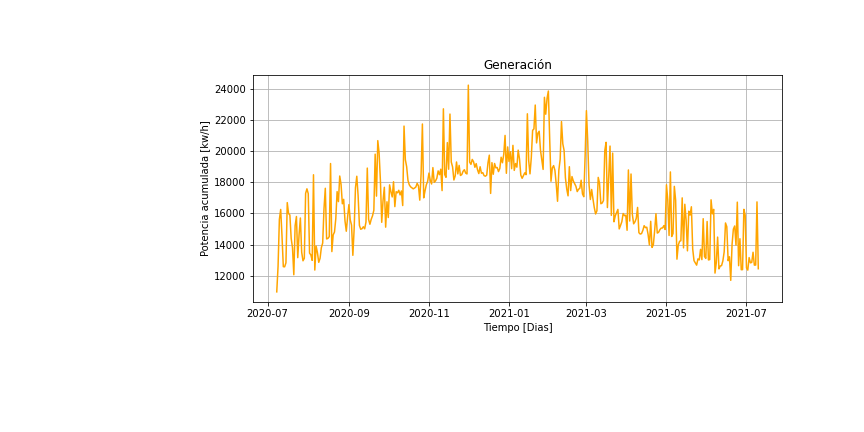

In [23]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')
_ ,y_d_d = func.get_daily_axes_from_modelChain_object(mc_D, 'System_D')
_ ,y_d_e = func.get_daily_axes_from_modelChain_object(mc_E, 'System_E')
_ ,y_d_f = func.get_daily_axes_from_modelChain_object(mc_F, 'System_F')

y_d = [a+b+c+d+e+f for a,b,c,d,e,f in zip(y_d_a,y_d_b,y_d_c,y_d_d,y_d_e,y_d_f)]

func.plot_1(x=x_d,
          y=y_d,
          size=(12,6),
          save='si',
          name_file='Sol_deSeptiembre_dias',
          color='orange',
          title='Generación',
          x_label='Tiempo [Dias]',
          y_label='Potencia acumulada [kw/h]')

<IPython.core.display.Javascript object>


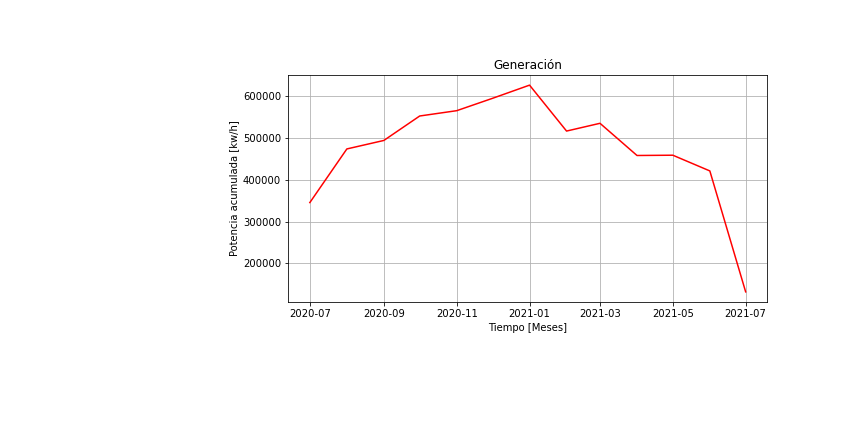

In [24]:
#falta modificar la data de entrada para que se grafique por hora
x_m, y_m_a = func.get_monthly_axes_from_modelChain_object(mc_A,'System_A')
_, y_m_b = func.get_monthly_axes_from_modelChain_object(mc_B,'System_B')
_, y_m_c = func.get_monthly_axes_from_modelChain_object(mc_C,'System_C')
_, y_m_d = func.get_monthly_axes_from_modelChain_object(mc_D,'System_D')
_, y_m_e = func.get_monthly_axes_from_modelChain_object(mc_E,'System_E')
_, y_m_f = func.get_monthly_axes_from_modelChain_object(mc_F,'System_F')

y_m = [a+b+c+d+e+f for a,b,c,d,e,f in zip(y_m_a,y_m_b,y_m_c,y_m_d,y_m_e,y_m_f)]

func.plot_1(x=x_m,
          y=y_m,
          size=(12,6),
          save='si',
          name_file='Sol_deSeptiembre_meses',
          color='red',
          title='Generación',
          x_label='Tiempo [Meses]',
          y_label='Potencia acumulada [kw/h]')